Source 항을 포함하는 2차원 Heat equation이 다음과 같이 주어진다.
∂φ∂t ൌαቆ∂ଶφ∂xଶ ൅∂ଶφ∂yଶቇ൅Sሺx, yሻ      െ1 ൑ x ൑ 1, െ1 ൑ y ൑ 1.
균일한 초기, 그리고 경계조건은 다음과 같이 주어진다.
균일한 초기 및 경계조건은 φ(x, y, 0) = 0,φ(±1, y,t) = 0,φ(x,±1,t) = 0이며, 본 문제에서 열전도율 α는 1로 주어진다.

2. uniform 격자계에서 시간에 대하여 Crank-Nicolson method를, 공간에 대하여 2차 central difference scheme을 사용하여 정상상태 (steady state)에 도달하도록 방정식을 푸시오. Exact solution과 수치해석한 정상상태의 solution을 시간간격 ∆t와 x, y 방향 격자수 (각각 N, M)에 변화를 주어 plot하시오.

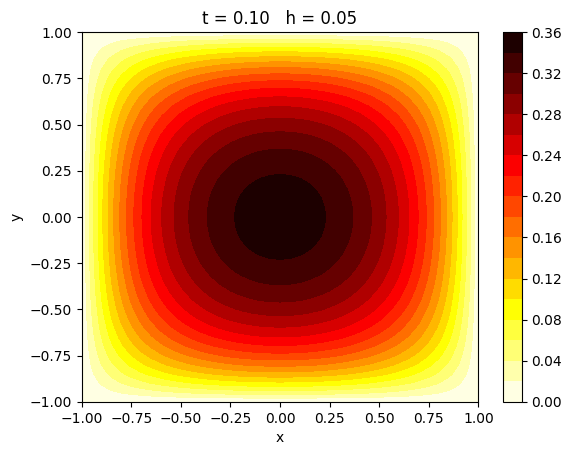

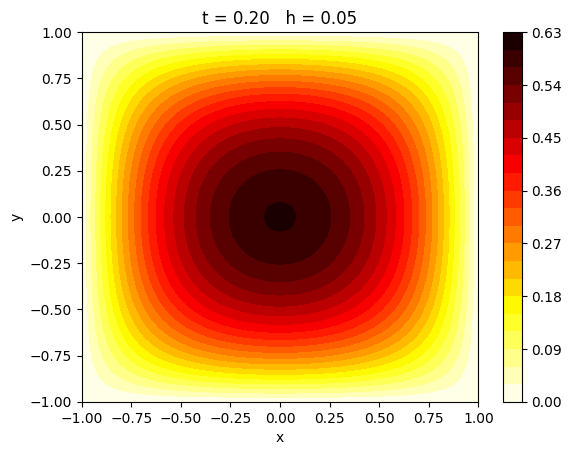

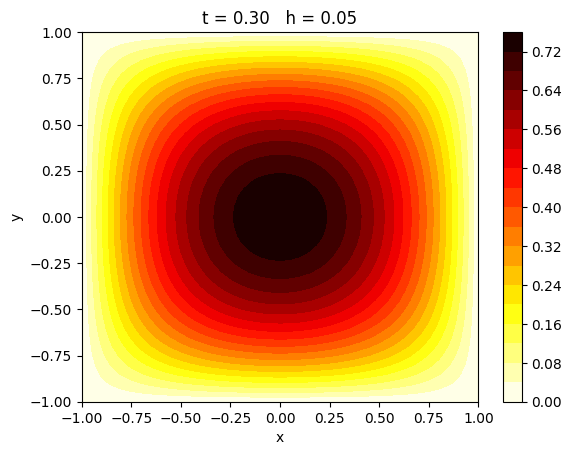

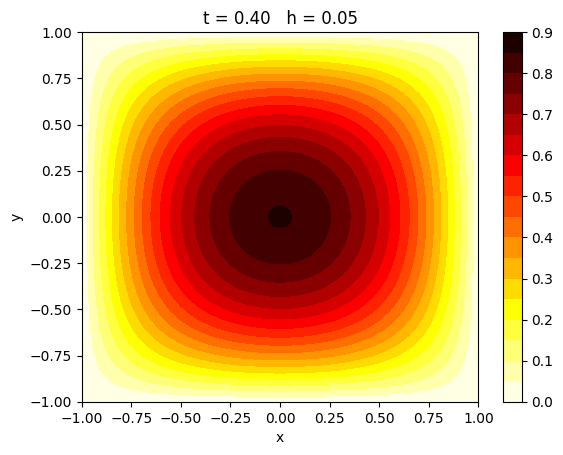

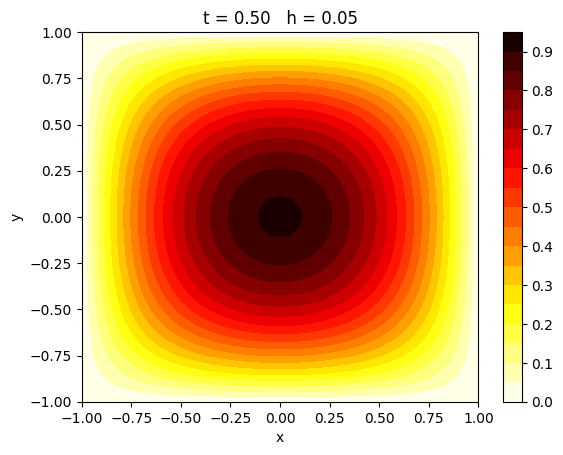

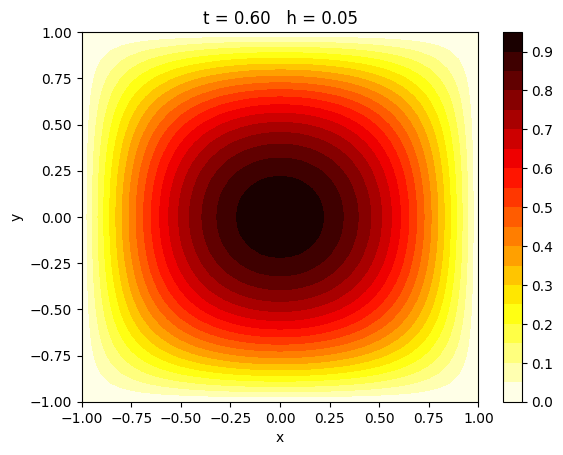

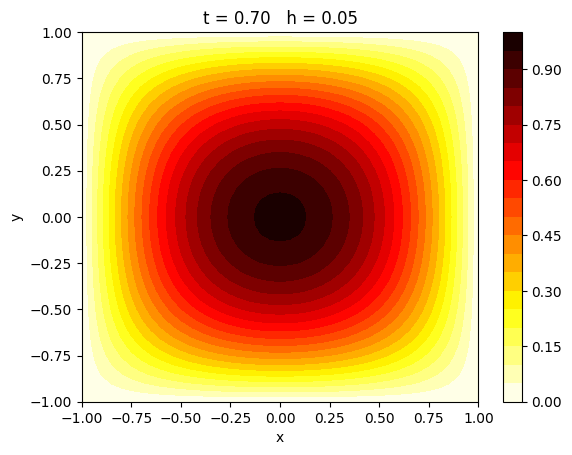

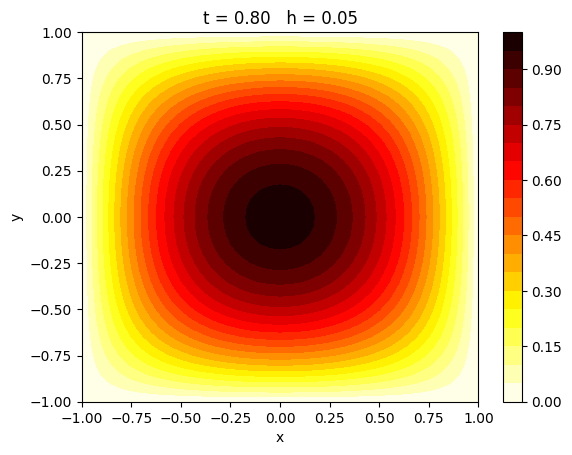

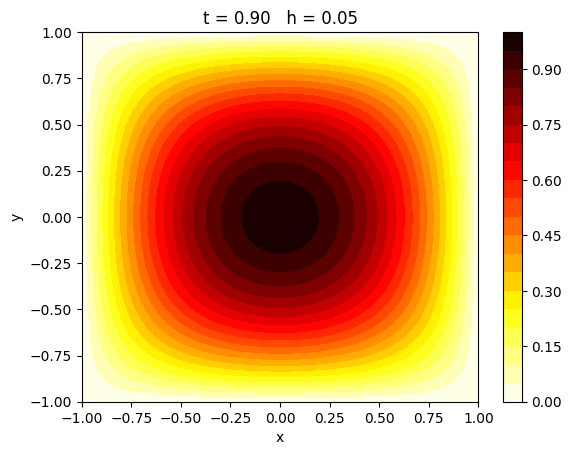

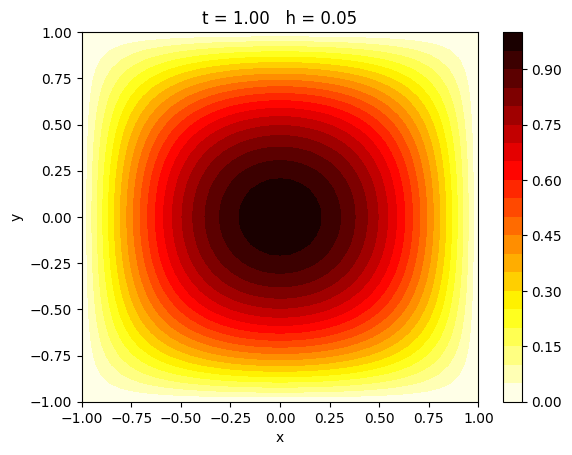

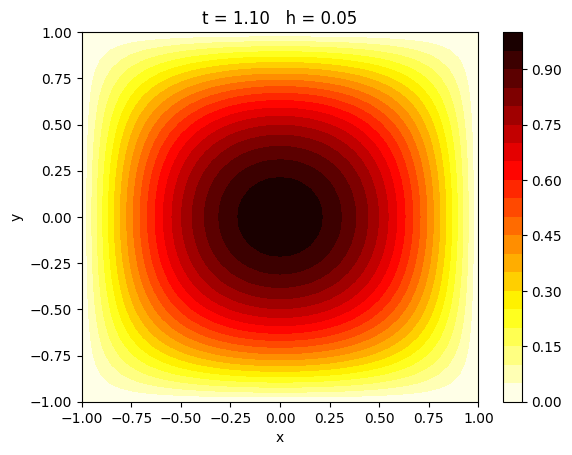

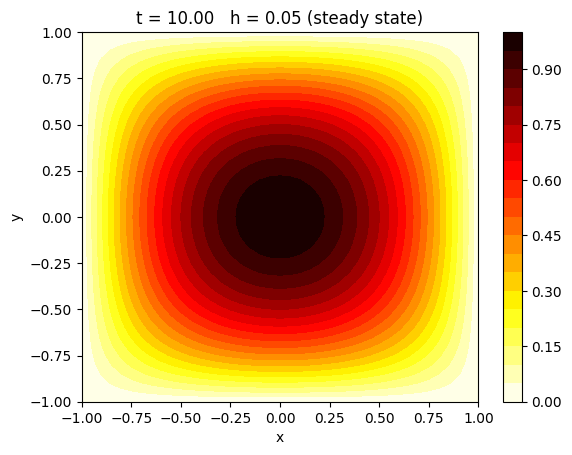

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# h=0.05일 때 시간에 따른 등고선 변화

alpha=1
n=41

def S(x, y):
    return 2*(2-x**2-y**2)

def exact_pi(x, y):
    return (1-x**2)*(1-y**2)

x_hani=np.linspace(-1, 1, n)
x_list=x_hani[1:-1]
y_hani=np.linspace(-1, 1, n)
y_list=y_hani[1:-1]
X,Y=np.meshgrid(x_hani, y_hani)
h=x_hani[1]-x_hani[0]
dt=0.1
t=0
beta=alpha*dt/(2*h**2)
phi_exact = exact_pi(X, Y)

pi=np.zeros((n, n))
pi_list=[pi,]

I_bLx_main = (1-2*beta)*np.eye(n-2)
I_bLx_upper = (beta)*np.eye(n-2, k=1)
I_bLx_lower = (beta)*np.eye(n-2, k=-1)
I_bLx = I_bLx_lower + I_bLx_main + I_bLx_upper

I__bLx_main = (1+2*beta)*np.eye(n-2)
I__bLx_upper = (-1*beta)*np.eye(n-2, k=1)
I__bLx_lower = (-1*beta)*np.eye(n-2, k=-1)
I__bLx = I__bLx_lower + I__bLx_main + I__bLx_upper

error_list=[]

for j in range(100):
    t+=dt
    R=I_bLx @ (I_bLx @ pi_list[j][1:-1, 1:-1].T).T +S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt
    psi=np.linalg.solve(I__bLx, R)
    pi_new = psi @ np.linalg.inv(I__bLx.T)
    pi_all=np.zeros((n,n))
    pi_all[1:-1, 1:-1]=pi_new
    pi_list.append(pi_all.copy())

    if j in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        plt.contourf(X, Y, pi_list[j+1], levels=20, cmap='hot_r')
        plt.colorbar()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f't = {t:.2f}   h = {h:.2f}')
        plt.show()
    elif j==99:
        plt.contourf(X, Y, pi_list[j+1], levels=20, cmap='hot_r')
        plt.colorbar()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f't = {t:.2f}   h = {h:.2f} (steady state)')
        plt.show()



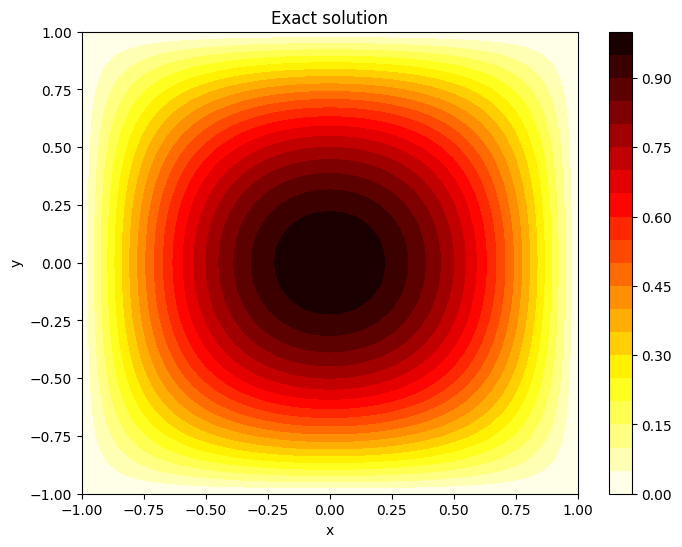

In [4]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, exact_pi(X, Y), levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Exact solution')
plt.show()

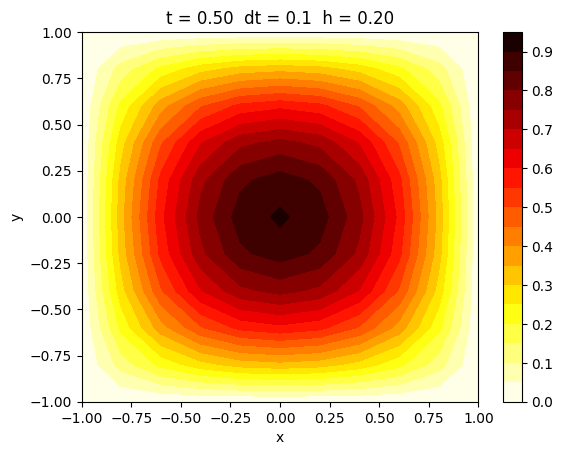

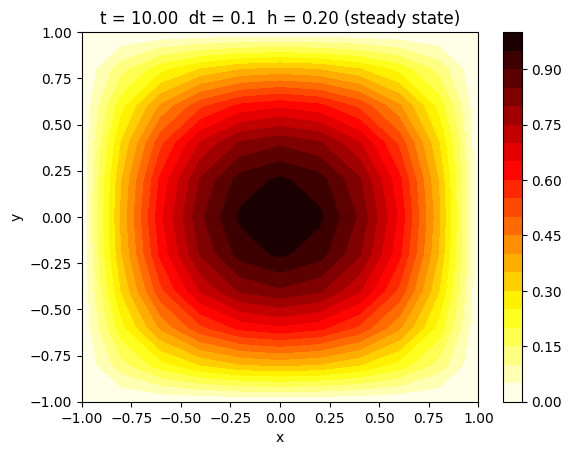

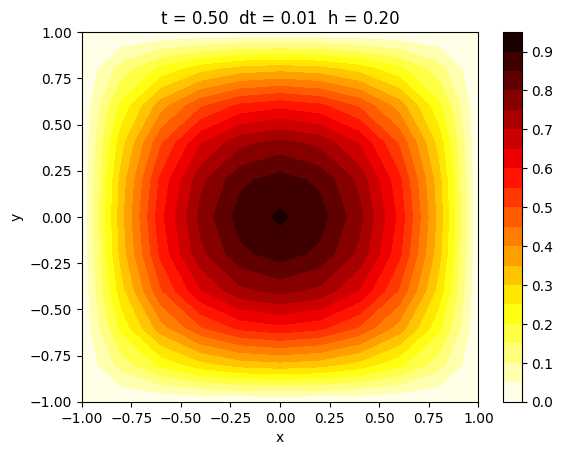

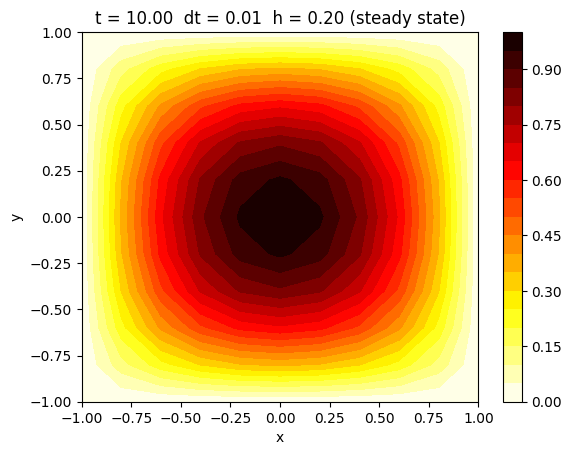

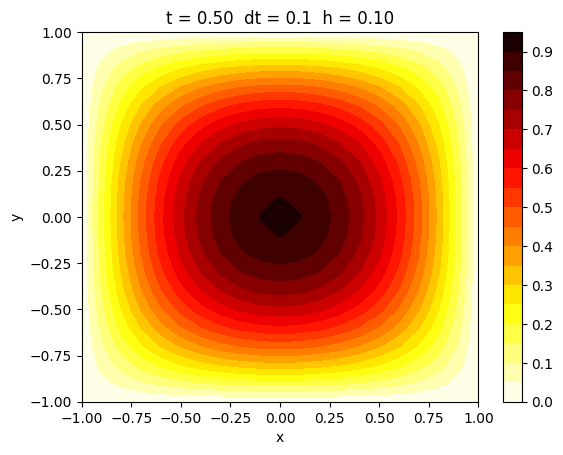

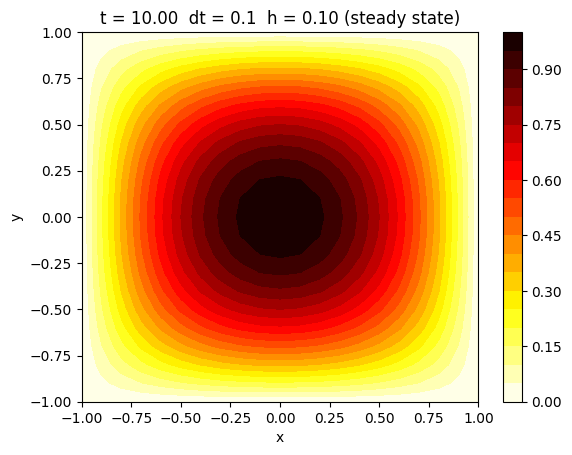

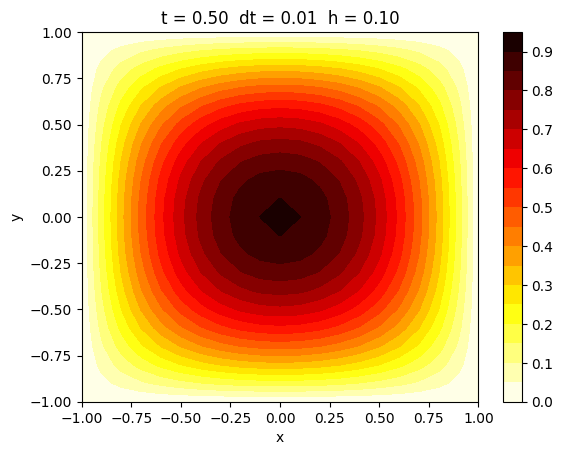

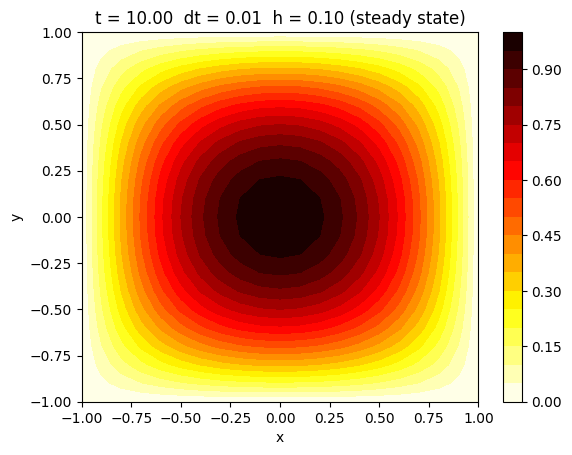

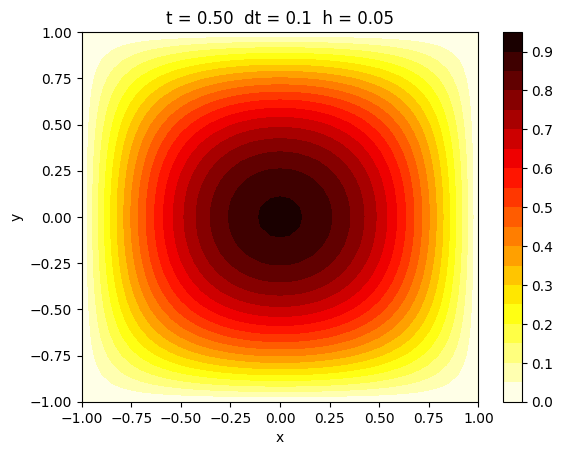

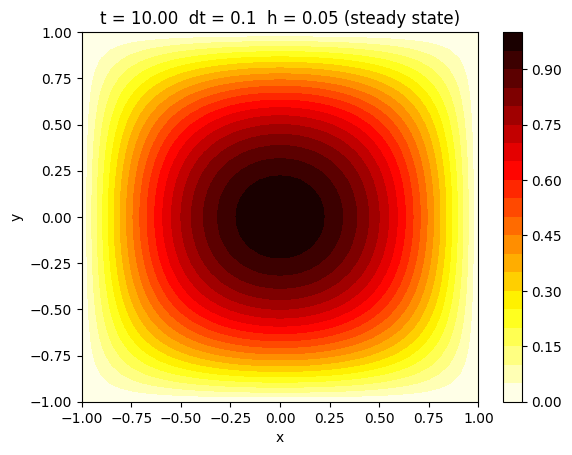

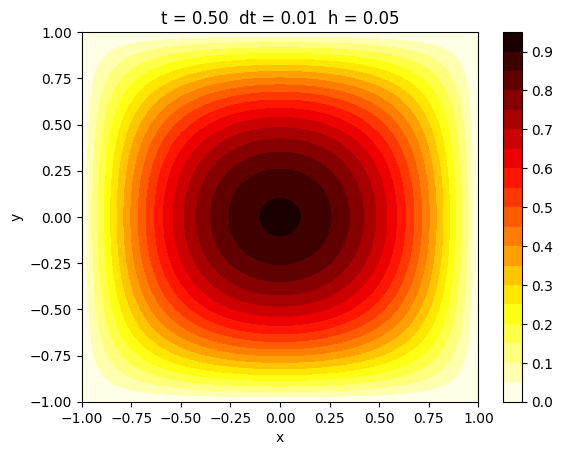

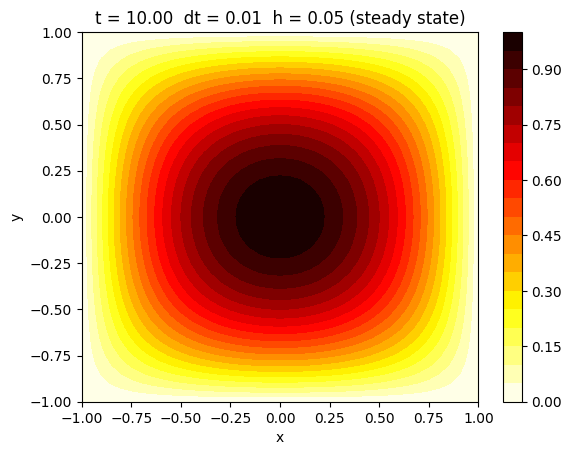

In [5]:
# dt=0.1, 0.2, 0.5 / h=0.2, 0.1, 0.05, 0.02일 때의 등고선 비교

for n in [11, 21, 41]:
    x_hani=np.linspace(-1, 1, n)
    x_list=x_hani[1:-1]
    y_hani=np.linspace(-1, 1, n)
    y_list=y_hani[1:-1]
    X,Y=np.meshgrid(x_hani, y_hani)
    h=x_hani[1]-x_hani[0]
    for m in [0.1, 0.01]:
        dt=m
        t=0
        beta=alpha*dt/(2*h**2)
        phi_exact = exact_pi(X, Y)

        pi=np.zeros((n, n))
        pi_list=[pi,]

        I_bLx_main = (1-2*beta)*np.eye(n-2)
        I_bLx_upper = (beta)*np.eye(n-2, k=1)
        I_bLx_lower = (beta)*np.eye(n-2, k=-1)
        I_bLx = I_bLx_lower + I_bLx_main + I_bLx_upper

        I__bLx_main = (1+2*beta)*np.eye(n-2)
        I__bLx_upper = (-1*beta)*np.eye(n-2, k=1)
        I__bLx_lower = (-1*beta)*np.eye(n-2, k=-1)
        I__bLx = I__bLx_lower + I__bLx_main + I__bLx_upper

        error_list=[]

        for j in range(1000):
            t+=dt
            R=I_bLx @ (I_bLx @ pi_list[j][1:-1, 1:-1].T).T +S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt
            psi=np.linalg.solve(I__bLx, R)
            pi_new = psi @ np.linalg.inv(I__bLx.T)
            pi_all=np.zeros((n,n))
            pi_all[1:-1, 1:-1]=pi_new
            pi_list.append(pi_all.copy())

            if j==int(1/(2*m)-1):
                plt.contourf(X, Y, pi_list[j+1], levels=20, cmap='hot_r')
                plt.colorbar()
                plt.xlabel('x')
                plt.ylabel('y')
                plt.title(f't = {t:.2f}  dt = {dt}  h = {h:.2f}')
                plt.show()

            elif j==int(10/m-1):
                plt.contourf(X, Y, pi_list[j+1], levels=20, cmap='hot_r')
                plt.colorbar()
                plt.xlabel('x')
                plt.ylabel('y')
                plt.title(f't = {t:.2f}  dt = {dt}  h = {h:.2f} (steady state)')
                plt.show()

3. 수치해석 결과의 order of accuracy를 시간과 공간에 대하여 분석하시오.

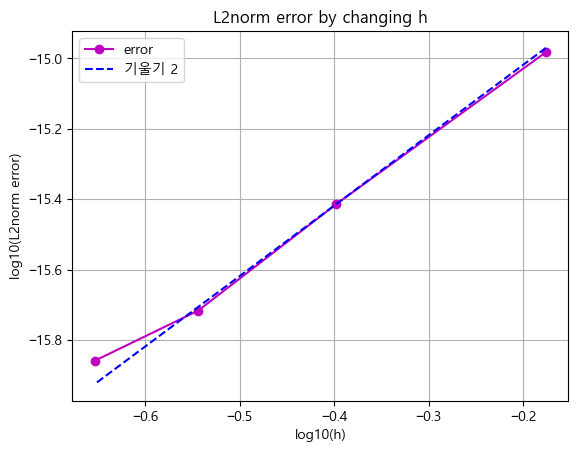

order of accuracy: 1.8737030036840558


In [8]:
from scipy.stats import linregress
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = ['Malgun Gothic', 'Arial', 'sans-serif']

# h의 L2norm error

error_list=[]
h_list=[]

def exact_pi(x, y):
    return (1-x**2)*(1-y**2)

for n in [4, 6, 8, 10]:
    # 4, 6, 8, 10
    x_hani=np.linspace(-1, 1, n)
    x_list=x_hani[1:-1]
    y_hani=np.linspace(-1, 1, n)
    y_list=y_hani[1:-1]
    X,Y=np.meshgrid(x_hani, y_hani)
    h=x_hani[1]-x_hani[0]
    dt=0.1
    t=0
    beta=alpha*dt/(2*h**2)
    phi_exact = exact_pi(X, Y)

    pi=np.zeros((n, n))
    pi_list=[pi,]

    I_bLx_main = (1-2*beta)*np.eye(n-2)
    I_bLx_upper = (beta)*np.eye(n-2, k=1)
    I_bLx_lower = (beta)*np.eye(n-2, k=-1)
    I_bLx = I_bLx_lower + I_bLx_main + I_bLx_upper

    I__bLx_main = (1+2*beta)*np.eye(n-2)
    I__bLx_upper = (-1*beta)*np.eye(n-2, k=1)
    I__bLx_lower = (-1*beta)*np.eye(n-2, k=-1)
    I__bLx = I__bLx_lower + I__bLx_main + I__bLx_upper

    h_list.append(h)

    for j in range(99):
        t+=dt
        R=I_bLx @ (I_bLx @ pi_list[j][1:-1, 1:-1].T).T +S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt
        psi=np.linalg.solve(I__bLx, R)
        pi_new = psi @ np.linalg.inv(I__bLx.T)
        pi_all=np.zeros((n,n))
        pi_all[1:-1, 1:-1]=pi_new
        pi_list.append(pi_all.copy())

    error=np.linalg.norm(exact_pi(X, Y)-pi_list[-1], 2)*h
    error_list.append(error.copy())

plt.plot(np.log10(h_list), np.log10(error_list), marker='o', color='m', label='error')
plt.plot(np.log10(h_list), 2*(np.log10(h_list)-np.log10(h_list[1]))+np.log10(error_list[1]), linestyle='--', color='b', label='기울기 2')
plt.xlabel('log10(h)')
plt.ylabel('log10(L2norm error)')
plt.title('L2norm error by changing h')
plt.grid()
plt.legend()
plt.show()

print(f'order of accuracy: {linregress(np.log10(h_list), np.log10(error_list)).slope}')

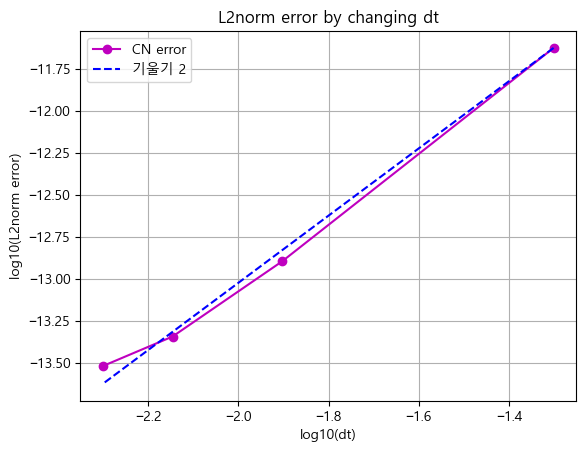

order of accuracy: 1.939069822610387


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# dt의 L2norm error

error_list=[]
dt_list=[]


n=101
x_hani=np.linspace(-1, 1, n)
x_list=x_hani[1:-1]
y_hani=np.linspace(-1, 1, n)
y_list=y_hani[1:-1]
X,Y=np.meshgrid(x_hani, y_hani)
h=x_hani[1]-x_hani[0]
pi=np.zeros((n, n))


for k in [20, 80, 140, 200]:
    dt=1/k
    t=0
    dt_list.append(dt)
    pi_list=[pi,]
    beta=alpha*dt/(2*h**2)
    phi_exact = exact_pi(X, Y)

    I_bLx_main = (1-2*beta)*np.eye(n-2)
    I_bLx_upper = (beta)*np.eye(n-2, k=1)
    I_bLx_lower = (beta)*np.eye(n-2, k=-1)
    I_bLx = I_bLx_lower + I_bLx_main + I_bLx_upper

    I__bLx_main = (1+2*beta)*np.eye(n-2)
    I__bLx_upper = (-1*beta)*np.eye(n-2, k=1)
    I__bLx_lower = (-1*beta)*np.eye(n-2, k=-1)
    I__bLx = I__bLx_lower + I__bLx_main + I__bLx_upper
    for j in range(10*k):
        t+=dt
        R=I_bLx @ (I_bLx @ pi_list[j][1:-1, 1:-1].T).T +S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt
        psi=np.linalg.solve(I__bLx, R)
        pi_new = psi @ np.linalg.inv(I__bLx.T)
        pi_all=np.zeros((n,n))
        pi_all[1:-1, 1:-1]=pi_new
        pi_list.append(pi_all.copy())

    error=np.linalg.norm(exact_pi(X, Y)-pi_list[-1], 2)*h
    error_list.append(error.copy())

plt.plot(np.log10(dt_list), np.log10(error_list), marker='o', color='m', label='CN error')
plt.plot(np.log10(dt_list), 2*(np.log10(dt_list)-np.log10(dt_list[0]))+np.log10(error_list[0]), linestyle='--', color='b', label='기울기 2')
plt.xlabel('log10(dt)')
plt.ylabel('log10(L2norm error)')
plt.title('L2norm error by changing dt')
plt.grid()
plt.legend()
plt.show()

print(f'order of accuracy: {linregress(np.log10(dt_list), np.log10(error_list)).slope}')